In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# inladen van de image en vertalen naar een array van rgb waardes
image = Image.open('resources/images/test_1.png', 'r').convert('RGB')
image_data = np.array(image.getdata()).reshape((image.height, image.width, 3))
Y_POS = 290
X_START = 550
SAMPLE_SIZE = 8

FileNotFoundError: [Errno 2] No such file or directory: 'resources/images/test_1.png'

In [3]:
# vertalen van ruwe data naar een gemiddelde door de sample te slicen, en de mean van de waars
def get_average(data, x, y, size):
    start_x = max(int(y - size / 2), 0)
    start_y = max(int(x - size / 2), 0)
    end_x = min(int(y + size / 2), data.shape[1])
    end_y = min(int(x + size / 2), data.shape[1])
    samples = data[start_x:end_x, start_y:end_y]
    sample_stream = samples.transpose(2, 0, 1).reshape(3, -1)
    return np.mean(sample_stream, axis=1)

baseline = get_average(image_data, 400, Y_POS, 16)

NameError: name 'image_data' is not defined

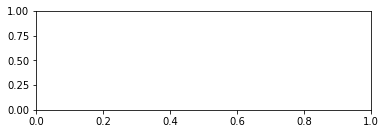

In [5]:
plt.subplot(2, 1, 1)
plt.imshow(image_data, aspect='auto')
plt.hlines([Y_POS], xmin=0, xmax=image.width, colors=['orange'])
plt.margins(x=0)
plt.title('Sample image')
# loop die loopt van pos 400x300 naar 200x300
average_pixel_values = []
distances_to_baseline = []

In [ ]:
for i in range(0, image.width, 1):
    y = Y_POS
    average = get_average(image_data, i, y, SAMPLE_SIZE)
    average_pixel_values.append(average)
    distances_to_baseline.append(np.linalg.norm(average - baseline))

average_pixel_rgb = np.transpose(average_pixel_values)


In [ ]:
plt.subplot(2, 1, 2)
# plt.hlines(baseline, xmin=0, xmax=X_START, colors=['red', 'green', 'blue'], linestyles='dashed')
# plt.plot(average_pixel_rgb[0], color='red', label='Average red')
# plt.plot(average_pixel_rgb[1], color='green', label='Average green')
# plt.plot(average_pixel_rgb[2], color='blue', label='Average blue')
plt.plot(distances_to_baseline)
# plt.legend(loc='lower right')

plt.title('Difference in color value (y = {}, sample_size = {})'.format(Y_POS, SAMPLE_SIZE))
plt.ylabel('Euclidean distance')
plt.xlabel('x position of sample pixel')
plt.margins(x=0)

plt.show()
plt.close()